<a href="https://colab.research.google.com/github/sraz96/Bharat_Intern_June/blob/main/Tesla_Stock_Predic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [4]:
data = pd.read_csv('TSLA.csv')

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [6]:
data.shape

(2416, 7)

In [7]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


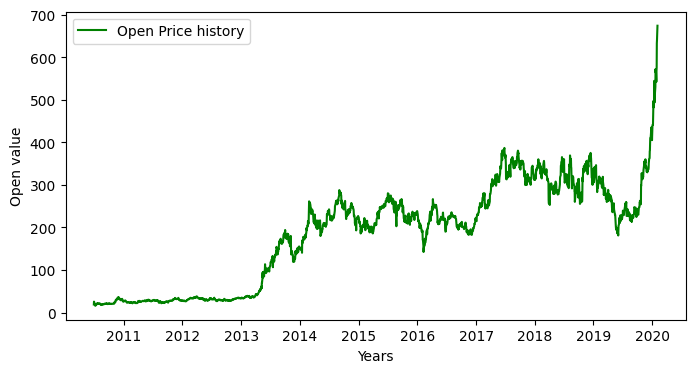

In [13]:
data["Date"] = pd.to_datetime(data['Date'])
plt.figure(figsize = (8,4))
plt.plot(data["Date"],data['Open'],label='Open Price history',color="green")
plt.xlabel("Years")
plt.ylabel("Open value")
plt.legend()

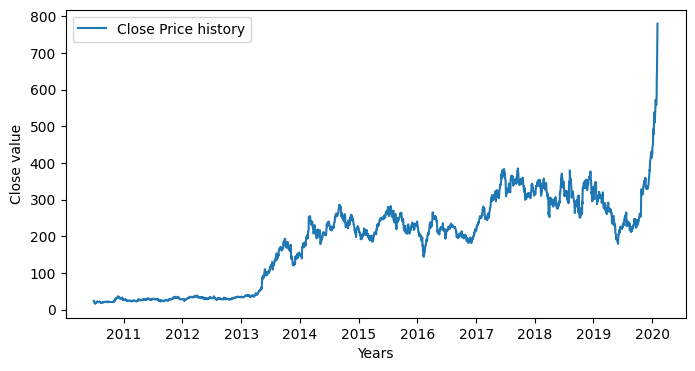

In [14]:
data["Date"] = pd.to_datetime(data['Date'],format="%m/%d/%Y")
plt.figure(figsize = (8,4))
plt.plot(data["Date"],data['Close'],label='Close Price history')
plt.xlabel("Years")
plt.ylabel("Close value")
plt.legend()

In [15]:
print('Total number of days: ',data.shape[0])
print('Total number of Attributes: ',data.shape[1])

Total number of days:  2416
Total number of Attributes:  7


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


In [17]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


<ipython-input-18-abc5c8dbb160>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

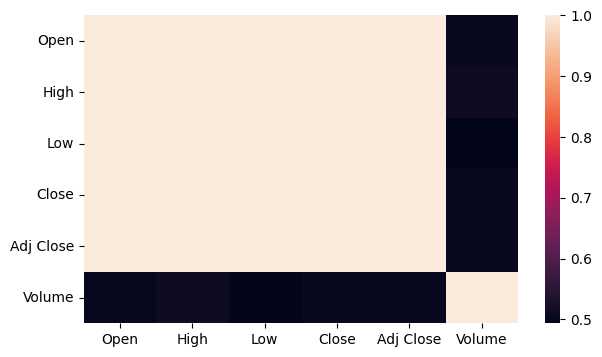

In [18]:
plt.figure(figsize = (7,4))
sns.heatmap(data.corr())

In [19]:
data.corr()


<ipython-input-19-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.998886,0.501762
High,0.999425,1.000000,0.999389,0.999640,0.999640,0.512944
Low,0.999575,0.999389,1.000000,0.999447,0.999447,0.493496
Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Adj Close,0.998886,0.999640,0.999447,1.000000,1.000000,0.505169
Volume,0.501762,0.512944,0.493496,0.505169,0.505169,1.000000


In [20]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
data.isnull().values.any()

False

In [22]:
data.drop(data[['Volume','Adj Close']],axis=1)

,Date,Open,High,Low,Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001
...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007


In [23]:
monthvise= data.groupby(data['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,209.242206,210.222451
February,178.162873,178.944196
March,176.871333,176.424257
April,181.282473,181.579732
May,180.304767,180.355285
June,194.936995,195.216684
July,180.523744,180.305450
August,184.877085,185.050134
September,184.999409,184.853694


In [24]:
from itertools import cycle
names = cycle(['Stock High Price','Stock Low Price'])
fig = px.line(data, x=data['Date'], y=[data['High'],data['Low']],labels={'Date':'Date','value':'Stock value'}, width=970,
    height=600)
fig.update_layout(title_text='Stock analysis chart', font_size=12, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:t.update(name = next(names)))
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

**## build the model LSTM**

In [25]:
close_data = data[['Date','Close']]
print("Shape of close dataframe:", close_data.shape)

Shape of close dataframe: (2416, 2)


In [26]:
del close_data['Date']
scaler=MinMaxScaler(feature_range=(0,1))
close_data=scaler.fit_transform(np.array(close_data).reshape(-1,1))
print(close_data.shape)

(2416, 1)


In [27]:
train_data=close_data[0:1300,:]
test_data=close_data[1300:,:]

In [28]:
print("train_data:",train_data.shape)
print("test_data:",test_data.shape)

train_data: (1300, 1)
test_data: (1116, 1)


In [29]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
time_step = 15
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [31]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1284, 15, 1)
X_test:  (1100, 15, 1)


In [32]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(None,1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 50)          10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(loss="mean_squared_error",optimizer="adam")
lstm = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 6s 74ms/step - loss: 0.0060 - val_loss: 8.5201e-04
Epoch 2/100
21/21 [==============================] - 1s 29ms/step - loss: 3.5244e-04 - val_loss: 7.6465e-04
Epoch 3/100
21/21 [==============================] - 1s 30ms/step - loss: 1.8584e-04 - val_loss: 7.9038e-04
Epoch 4/100
21/21 [==============================] - 1s 29ms/step - loss: 1.5009e-04 - val_loss: 6.8026e-04
Epoch 5/100
21/21 [==============================] - 1s 30ms/step - loss: 1.4479e-04 - val_loss: 6.8833e-04
Epoch 6/100
21/21 [==============================] - 1s 40ms/step - loss: 1.4483e-04 - val_loss: 7.7565e-04
Epoch 7/100
21/21 [==============================] - 1s 47ms/step - loss: 1.5126e-04 - val_loss: 6.9272e-04
Epoch 8/100
21/21 [==============================] - 1s 47ms/step - loss: 1.4769e-04 - val_loss: 7.0255e-04
Epoch 9/100
21/21 [==============================] - 1s 39ms/step - loss: 1.4192e-04 - val_loss: 6.8514e-04
Epoch 10/100
21/21 [============

In [35]:
model.evaluate(X_test,Y_test)

35/35 [==============================] - 1s 20ms/step - loss: 3.0738e-04


0.0003073795814998448

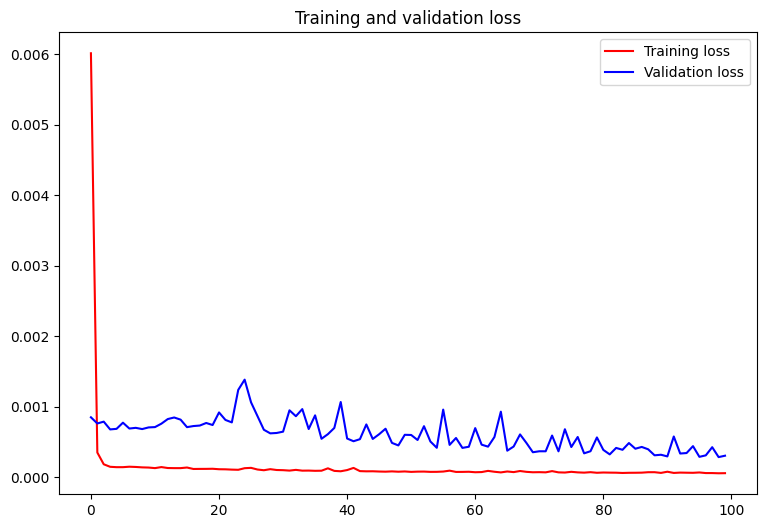

<Figure size 640x480 with 0 Axes>

In [36]:
loss = lstm.history['loss']
val_loss = lstm.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(9,6));
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [37]:
model.evaluate(X_train,Y_train)

41/41 [==============================] - 0s 9ms/step - loss: 5.7893e-05


5.7892622862709686e-05

In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

35/35 [==============================] - 0s 6ms/step


((1284, 1), (1100, 1))

In [39]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_Ytrain = scaler.inverse_transform(Y_train.reshape(-1,1))
original_Ytest = scaler.inverse_transform(Y_test.reshape(-1,1))

In [40]:
import math
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_Ytrain,train_predict))) #root mean square error
print("Train data MSE: ", mean_squared_error(original_Ytrain,train_predict)) #mean square error
print("Train data MAE: ", mean_absolute_error(original_Ytrain,train_predict)) #mean absolute error
print("--  --  --")
print("--  --  --")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_Ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_Ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_Ytest,test_predict))
print("--  --  --")
print("--  --  --")

from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:",
      explained_variance_score(original_Ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_Ytest, test_predict))

Train data RMSE:  5.8145836624651155
Train data MSE:  33.80938316780623
Train data MAE:  3.8224435670799184
--  --  --
--  --  --
Test data RMSE:  13.398141632998769
Test data MSE:  179.51019921789492
Test data MAE:  9.439199578633701
--  --  --
--  --  --
Train data explained variance regression score: 0.9960961213302709
Test data explained variance regression score: 0.9637296239660461


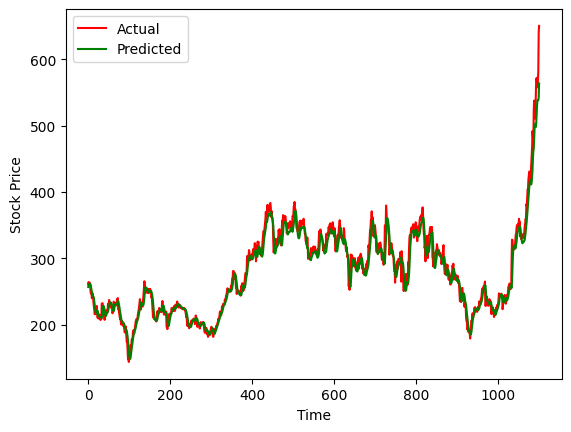

In [41]:
plt.plot(original_Ytest,color="red",label="Actual")
plt.plot(test_predict,color="green",label="Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()